# Visualizations
Before performing any type of analysis or machine learning, we first need to get a sense of what the data we're working with looks like.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import svds
import nltk
import seaborn as sns
from wordcloud import WordCloud
from dateutil.parser import parse

# Wine Review Data

In [2]:
wine_reviews = pd.read_json('wine-reviews/winemag-data-130k-v2.json')
# Preprocess
common_years = range(1975,2017)[::-1]
def getYear(row): 
    tokes = nltk.word_tokenize(row['title'])
    for t in tokes:
        try:
            y = int(t)
            if y in common_years:
                return y
        except:
            continue
    return 0
    
wine_reviews['year'] = wine_reviews.apply (lambda row: getYear(row), axis=1)
wine_reviews = wine_reviews[np.isfinite(wine_reviews['year'])]
wine_reviews = wine_reviews[(wine_reviews['year']) > 0]

wine_reviews['tokens'] = wine_reviews.apply (lambda row: nltk.word_tokenize(row['description'].lower()),axis=1)

wine_reviews = wine_reviews[np.isfinite(wine_reviews['price'])]
wine_reviews = wine_reviews[np.isfinite(wine_reviews['points'])]

In [3]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,tokens
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,"[this, is, ripe, and, fruity, ,, a, wine, that..."
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,"[tart, and, snappy, ,, the, flavors, of, lime,..."
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,"[pineapple, rind, ,, lemon, pith, and, orange,..."
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,"[much, like, the, regular, bottling, from, 201..."
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,None,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011,"[blackberry, and, raspberry, aromas, show, a, ..."


### Points Distribution

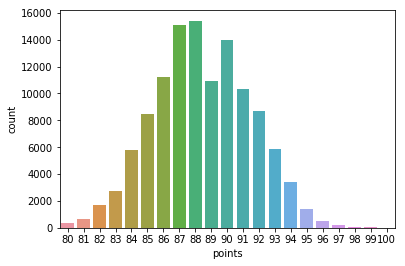

In [4]:
sns.countplot(wine_reviews['points'])

### Wines by Country

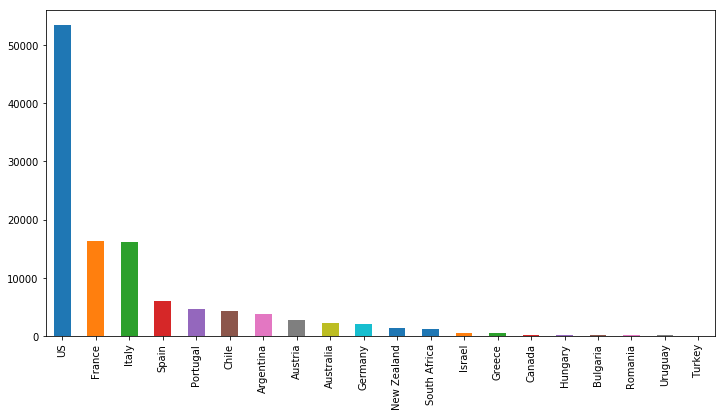

In [5]:
plt.figure(figsize = (12,6))
wine_reviews['country'].value_counts().head(20).plot.bar()

### Wines by Province

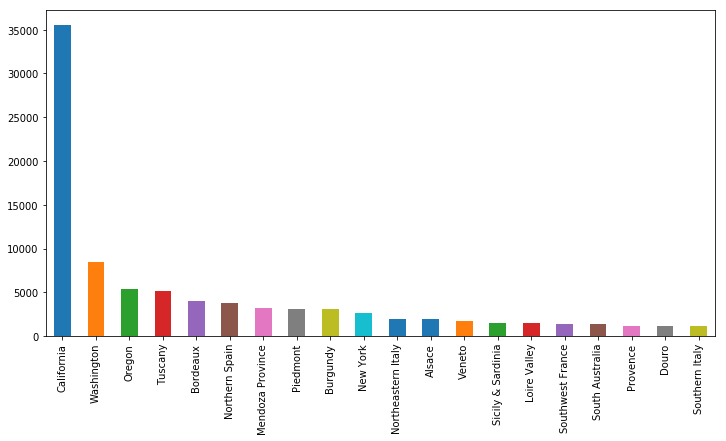

In [6]:
plt.figure(figsize = (12,6))
wine_reviews['province'].value_counts().head(20).plot.bar()

### Wines by Designation

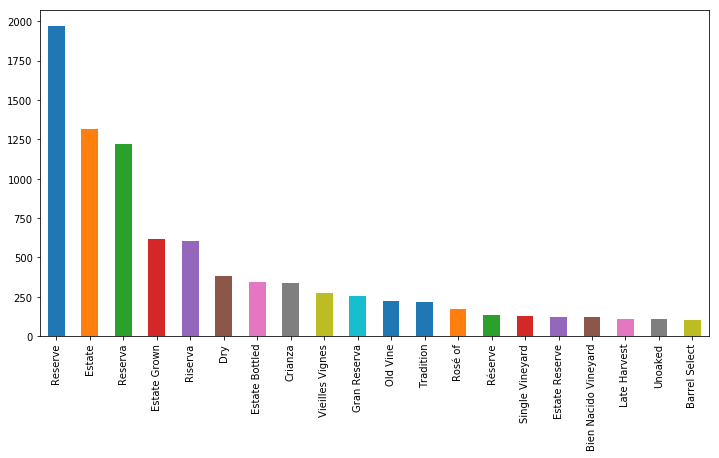

In [7]:
plt.figure(figsize = (12,6))
wine_reviews['designation'].value_counts().head(20).plot.bar()

### Wines by Year

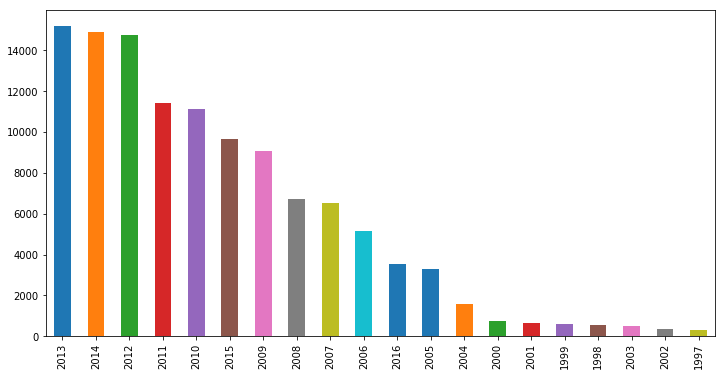

In [8]:
plt.figure(figsize = (12,6))
wine_reviews['year'].value_counts().head(20).plot.bar()

### Price Distribution

We restrict the plot to wines that are priced under $150 because that is where the majority of the area is.

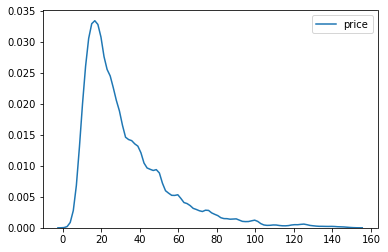

In [9]:
sns.kdeplot(wine_reviews.query('price < 150').price)

### Price vs. Points

We see a pearson correlation coefficient of ..

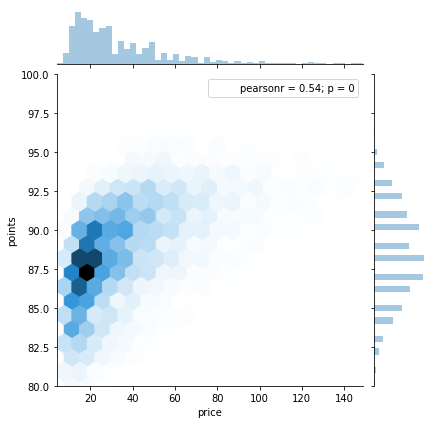

In [10]:
sns.jointplot(x='price', y='points', data=wine_reviews[wine_reviews['price'] < 150], kind='hex', gridsize=20)

### Boxplot of Varietals

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

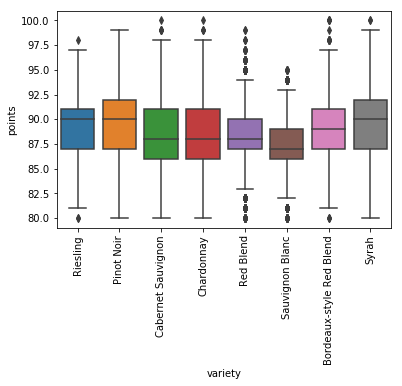

In [11]:
top_varietals = (wine_reviews.variety.value_counts().head(8).index)
df = wine_reviews[wine_reviews.variety.isin(top_varietals)]

plot = sns.boxplot(x='variety', y='points', data=df)
plt.xticks(rotation=90)

### Word Cloud of Most Popular Words in Descriptions

In [12]:
corpus = ''
for row in wine_reviews.iterrows():
    corpus += ' '.join(row[1]['tokens'])

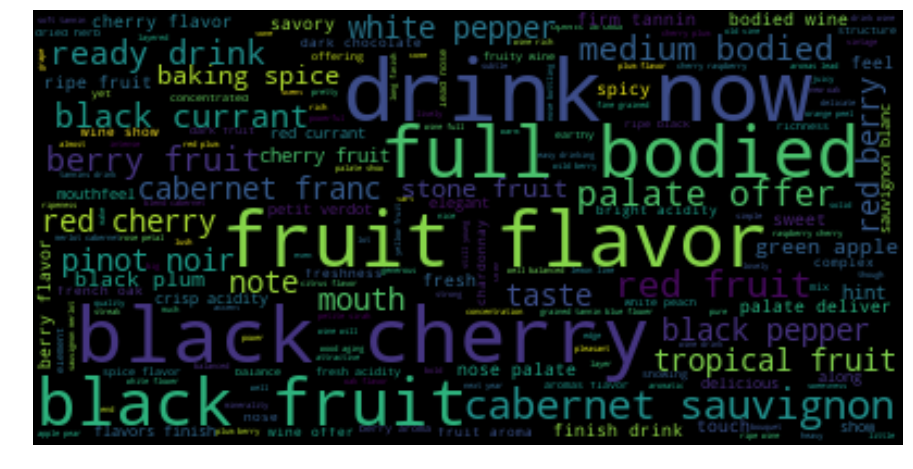

In [13]:
wordcloud = WordCloud(max_font_size=40).generate(corpus)
plt.figure(figsize = (20,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# plt.savefig('foo.png')

# Chemical Composition

In [14]:
red_comp = pd.read_csv('wine-quality/wineQualityReds.csv', index_col=0)
red_comp['red_or_white'] = 'red'
white_comp = pd.read_csv('wine-quality/wineQualityWhites.csv', index_col=0)
white_comp['red_or_white'] = 'white'
comp = red_comp.append(white_comp)

# Normalize combined data structure
data = comp.iloc[:,0:-1]
data_norm = (data - data.min()) / (data.max() - data.min())
# data_norm = (data-data.mean())/data.std()
composition = data_norm
composition['red_or_white'] = comp['red_or_white']

composition.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,red_or_white
1,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,red
2,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,red
3,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,red
4,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,red
5,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,red


### Quality Distribution

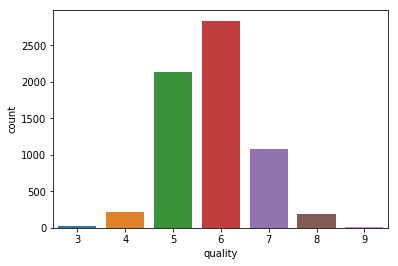

In [15]:
sns.countplot(comp['quality'])

### Feature Correlation Heatmap 

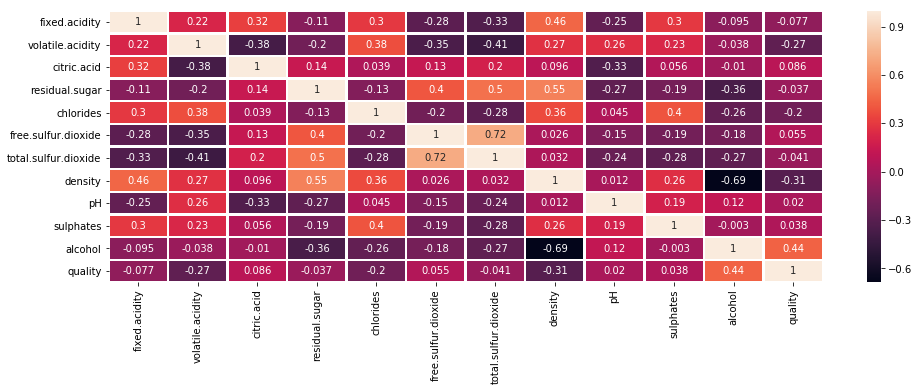

In [16]:
plt.figure(figsize = (16,5))
sns.heatmap(composition.corr(), annot=True, linewidths=1.5)

### Sample Comparison Across Features

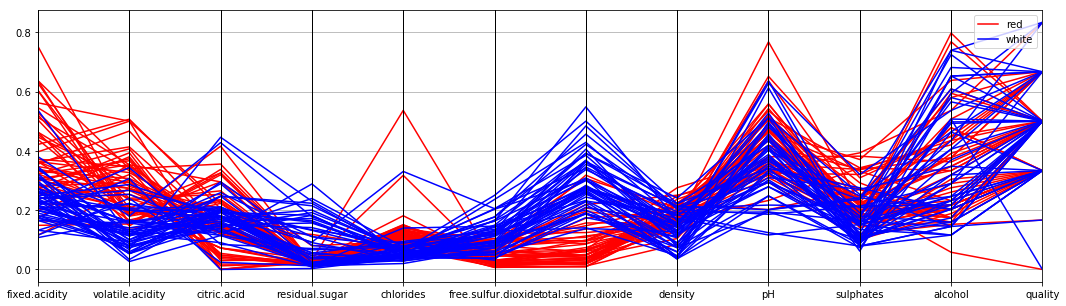

In [17]:
from pandas.plotting import parallel_coordinates

sample_size = 50
random_state = 40

f = composition[composition['red_or_white'] == 'red'].sample(sample_size, random_state=random_state)
g = composition[composition['red_or_white'] == 'white'].sample(sample_size, random_state=random_state)
sample = f.append(g)

plt.figure(figsize = (18,5))
parallel_coordinates(sample, 'red_or_white', color=['r','b'])

### Alcohol vs. Quality Distribution Plot and Heatmap

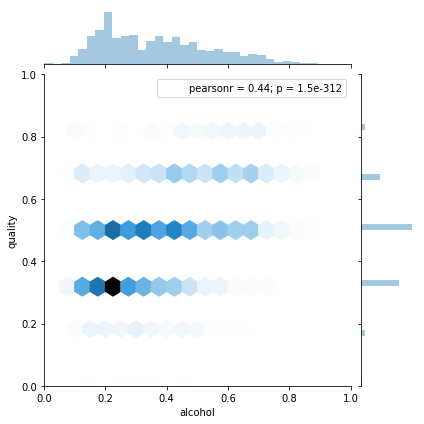

In [18]:
sns.jointplot(x='alcohol', y='quality', data=composition, kind='hex', gridsize=20)